# **Library**

In [1]:
# Import

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Flatten

# Version

print('Keras Version: {}'.format(keras.__version__))
print('Tensorflow Version: {}'.format(tf.__version__))

Keras Version: 2.9.0
Tensorflow Version: 2.9.2


# **Dataset**

### **Load and Preprocessing**

In [3]:
# Load Dataset (Training and Testing Datasets)

(trainingImages, trainingLabels), (testingImages, testingLabels) = keras.datasets.fashion_mnist.load_data()

# Preprocessing 

trainingImages = trainingImages / 255.0
testingImages = testingImages / 255.0 

# Visualize 

print('Number of Training Images: {}'.format(trainingImages.shape))
print('Number of Testing Images: {}'.format(testingImages.shape))

Number of Training Images: (60000, 28, 28)
Number of Testing Images: (10000, 28, 28)


### **Plotting**

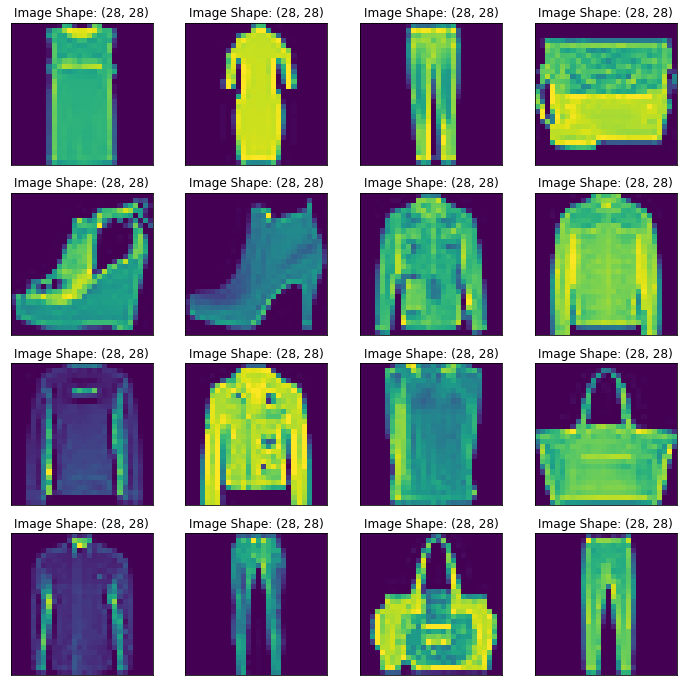

In [4]:
# Visualize

plt.figure(figsize = (12, 12))

idxs = np.random.choice(a = len(trainingImages), size = 16)

for idx, i in enumerate(idxs):

  plt.subplot(4, 4, idx+1)

  image = trainingImages[i] 
  label = trainingLabels[i]

  plt.imshow(image)
  plt.title('Image Shape: {}'.format(image.shape)) 
  plt.xticks([])
  plt.yticks([])

plt.show()

# **Model**

In [5]:
# Model 

model = keras.Sequential([Flatten(), 
                          Dense(units = 128, activation = 'relu'), 
                          Dense(units = 10, activation = 'softmax')])

# Compile 

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

# Training 

history = model.fit(x = trainingImages, y = trainingLabels, batch_size = 128, epochs = 20)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.5534 - accuracy: 0.8094
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4043 - accuracy: 0.8572
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3631 - accuracy: 0.8703
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3374 - accuracy: 0.8788
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3191 - accuracy: 0.8855
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3024 - accuracy: 0.8898
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2948 - accuracy: 0.8927
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2823 - accuracy: 0.8967
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2724 - accuracy: 0.9005
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2636 - accuracy: 0.9041

# **Training Resume**

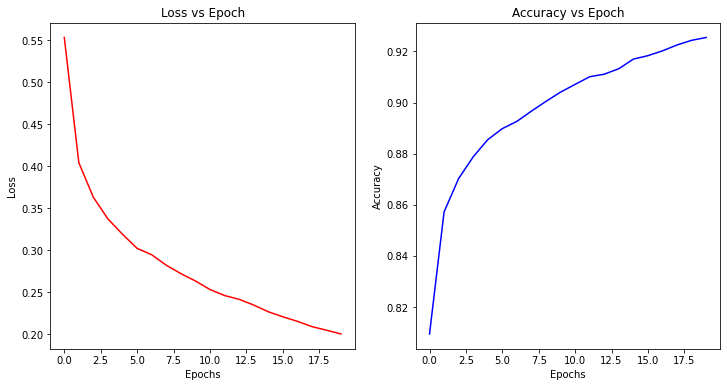

In [6]:
# Visualize 

graph = history.history

fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

ax.plot(history.epoch, graph['loss'], c = 'red')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Epoch')

ax1.plot(history.epoch, graph['accuracy'], c = 'blue')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Epoch')

plt.show()

# **Inference**

In [7]:
# Result Inference Testing Data

testingAccuracy = model.evaluate(testingImages, testingLabels, verbose = False)

# Visualize

print('Testing Dataset Predictions Accuracy: {:.4f}'.format(testingAccuracy[1]))
print('Testing Dataset Predictions Loss: {:.4f}'.format(testingAccuracy[0]))

Testing Dataset Predictions Accuracy: 0.8847
Testing Dataset Predictions Loss: 0.3368
